# Polygon Size Regression

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import os

import numpy as np
import matplotlib.pyplot as plt
import torch
import torch_geometric
import yaml
from pytorch_lightning import Trainer
from pytorch_lightning.loggers import WandbLogger

from utils import *
sys.path.append("../lightning_modules")

In [3]:
from torch_geometric.data import Data

from Regression.Models.interaction_gnn import InteractionGNN

## Polygon Building Function

In [51]:
R = 1
x0, y0 = 0, 1
theta0 = 0.5
N = 5

In [52]:
seed_point = rotate(np.array([0, R]), theta0)
O = np.array([x0, y0])

In [53]:
nodes = np.tile(seed_point, (N, 1)).astype(float)
rotations = np.linspace(0, 2*np.pi, N+1)[:-1]

In [54]:
for i, rotation in enumerate(rotations):
    nodes[i] = rotate(nodes[i], rotation)

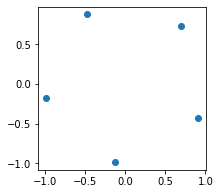

In [55]:
fig = plt.figure(figsize=(3, 3))
plt.scatter(nodes.T[0], nodes.T[1])

In [56]:
nodes = nodes + O

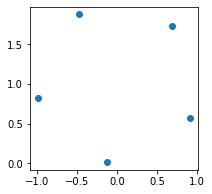

In [57]:
fig = plt.figure(figsize=(3, 3))
plt.scatter(nodes.T[0], nodes.T[1])

## Dataset Generation

In [139]:
nodes, edges, N = generate_polygon(5)

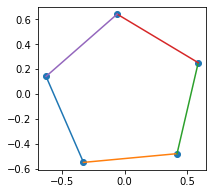

In [140]:
fig = plt.figure(figsize=(3, 3))
plt.scatter(nodes.T[0], nodes.T[1])
plt.plot(nodes[:, 0][edges], nodes[:, 1][edges]); 

In [146]:
polygons = []
n_polygons = 1000

for i in range(n_polygons):
    
    nodes, edges, N = generate_polygon()
    polygons.append(Data(x=nodes, edge_index=edges, y=torch.tensor(N)))

## Model Setup

In [4]:
with open("pentagon_config.yaml") as f:
    hparams = yaml.load(f, Loader=yaml.FullLoader)

In [5]:
model = InteractionGNN(hparams)

In [6]:
model.setup(stage="fit")

Setting up dataset


## Training

In [7]:
logger = WandbLogger(project=hparams["project"], group="InitialTest", save_dir=hparams["artifacts"])
trainer = Trainer(gpus=1, max_epochs=hparams["max_epochs"], logger=logger)#, precision=16)
trainer.fit(model)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: murnanedaniel (use `wandb login --relogin` to force relogin)
wandb: wandb version 0.12.9 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name                    | Type       | Params
-------------------------------------------------------
0 | node_encoder            | Sequential | 320   
1 | edge_encoder            | Sequential | 800   
2 | edge_network            | Sequential | 1.1 K 
3 | node_network            | Sequential | 1.1 K 
4 | output_graph_regression | Sequential | 561   
-------------------------------------------------------
3.8 K     Trainable params
0         Non-trainable params
3.8 K     Total params
0.015     Total estimated model params size (MB)


Validation sanity check:   0%|          | 0/1 [00:00<?, ?it/s]tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.], device='cuda:0') torch.Size([100])
tensor([0.2113, 0.1564, 0.1578, 0.1523, 0.1930, 0.2269, 0.2271, 0.2154, 0.1544,
        0.2256, 0.1905, 0.2125, 0.2126, 0.1879, 0.2265, 0.2158, 0.1929, 0.1933,
        0.1930, 0.1926, 0.2142, 0.2274, 0.2247, 0.2270, 0.2277, 0.1581, 0.1896,
        0.2119, 0.2273, 0.1577, 0.1558, 0.1540, 0.1920, 0.2156, 0.2152, 0.1890,
        0.2130, 0.2148, 0.2156, 0.1501, 0.1546, 0.1578, 0.1921, 0.1482, 0.2258,
        0.1927, 0.2156, 0.2273, 0.1895, 0.1546, 0.1858, 0.2272

/global/homes/d/danieltm/.local/lib/python3.8/site-packages/pytorch_lightning/trainer/data_loading.py:110: UserWarning: The dataloader, val_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 256 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
/global/homes/d/danieltm/.local/lib/python3.8/site-packages/pytorch_lightning/utilities/data.py:56: UserWarning: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 5. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.
  warning_cache.warn(
/global/homes/d/danieltm/.local/lib/python3.8/site-packages/pytorch_lightning/trainer/data_loading.py:110: UserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 256 which is the number of cpus on

Epoch 0:  91%|█████████ | 10/11 [00:00<00:00, 70.17it/s, loss=3, v_num=zu1b]  
Validating: 0it [00:00, ?it/s]
Validating:   0%|          | 0/1 [00:00<?, ?it/s]tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], device='cuda:0') torch.Size([100])
tensor([1.4890, 1.4832, 1.4830, 1.4834, 1.4871, 1.4890, 1.4886, 1.4882, 1.4834,
        1.4892, 1.4875, 1.4889, 1.4889, 1.4879, 1.4890, 1.4882, 1.4874, 1.4871,
        1.4870, 1.4869, 1.4886, 1.4888, 1.4895, 1.4890, 1.4885, 1.4829, 1.4875,
        1.4890, 1.4884, 1.4829, 1.4831, 1.4832, 1.4874, 1.4881, 1.4883, 1.4878,
        1.4888, 1.4879, 1.4883, 1.483

## Visualise Examples

In [12]:
from matplotlib.pyplot import cm

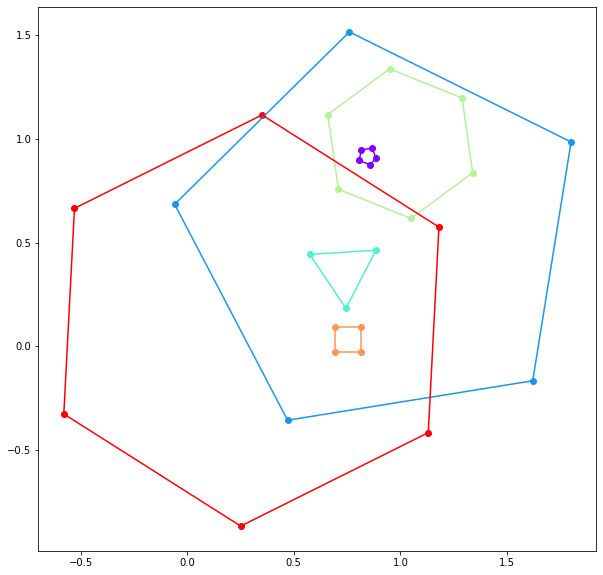

In [22]:
n=6

color = iter(cm.rainbow(np.linspace(0, 1, n)))

plt.figure(figsize=(10,10))
for polygon in model.valset[:n]:
    c = next(color)
    plt.scatter(polygon.x.T[0], polygon.x.T[1], color=c);
    plt.plot(polygon.x[:, 0][polygon.edge_index], polygon.x[:, 1][polygon.edge_index], c=c); 
    